<a href="https://colab.research.google.com/github/Ayushman0Singh/BikeSharingDemandPrediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Business Goal**
From a business point of view. This seems like a probelem where we need to predict the demand of rental motor cycless in order to make sure that supply is always equal to the demand. If enough motorcycles are not available on time at crowded place then the company loses out on potenial customers. Similary, If there are too many motor-cycles available at one place where there arent too many users then the company is wasting its resources at that place. Therefore, understanding and forecasting the demand is crucial to run a profitable business. 

This looks like a regression problem since we are predicting a continuos variable. Further, lets look into the data available to us, the features and EDA could help us choose an approach and give us more insights. So, lets jump into the data!



In [30]:
# importing our data handling tools
import numpy as np
import pandas as pd
import numpy as math 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [31]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Supervised ML-Regression /SeoulBikeData.csv'
df = pd.read_csv(file_path,encoding= 'unicode_escape')

# **Data Inspection**

In [33]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#checking the available columns 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# **Defining the required metric**

**Data Description**


The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:


Date : year-month-day


Rented Bike count - Count of bikes rented at each hour


Hour - Hour of he day


Temperature-Temperature in Celsius


Humidity - %


Windspeed - m/s


Visibility - 10m


Dew point temperature - Celsius


Solar radiation - MJ/m2


Rainfall - mm


Snowfall - cm


Seasons - Winter, Spring, Summer, Autumn


Holiday - Holiday/No holiday


Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

The Business Problem and the Business Metric that will be the key KPI to measure success here will be Rented Bike Count.

From the given columns we can conclude that **Rented bike count** is an appropiate measure for demand. That will be our depeandant variable in this case.

The data is of one complete year, We have data from 365 days and 24 hours of each day. So we know the hourly demand of bikes for one complete year and we are required to predict the further demand of these bikes. 

We can safely say that the other columns are features of this dependant variable. Lets do some EDA to understand these features and thier relationship with the dependant variable.



In [34]:
#checking for column data-type and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Amazing! None the of the data points have null/missing values. The data type of these columns also seems to be correct. We are lucky to have been given such a clean a data-frame. From the first look, there is not much manipulation/cleaning required unlike most other data-sets.

# **EDA**

In [36]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The mean and median seem to be close to each other which suggest that the data is not influenced by outliers.

**Single variable analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


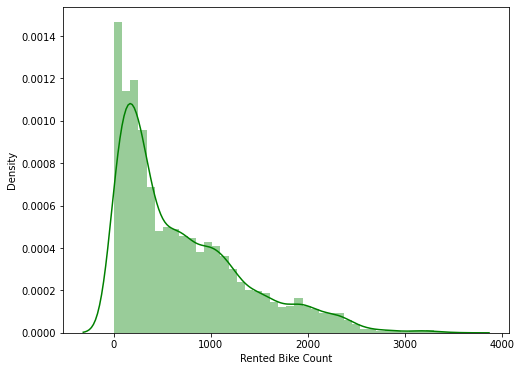

In [37]:
# distribution of the dependant variable
plt.figure(figsize=(8,6))
sns.distplot(df['Rented Bike Count'],color="g")

There many zeros in rented bike counts. This indicates that the business might be losing a lot of value in providing rental bikes when there is no demand for it. 

We can see that the data is slightly skewed to the right. Lets apply square-root to even out the distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


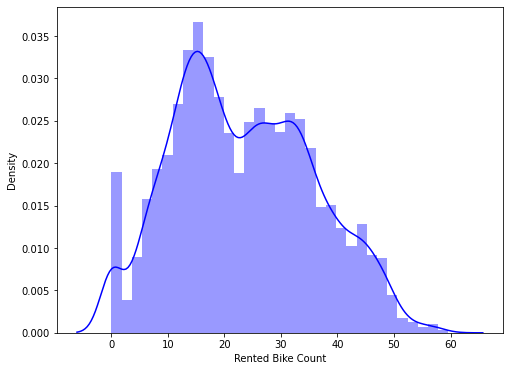

In [38]:
# Applying sqrt
plt.figure(figsize=(8,6))
sns.distplot(math.sqrt(df['Rented Bike Count']),color="b")

This transformation makes the dependent variable less skewed!

Lets have a look at each numeric variable's indivisual distribution (Univariate analysis). This will help us look at the central trend, skewness and outliers of each of these variables. 

In [39]:
# getting all the numeric columns
numeric_features = list(df.describe().columns)
print(numeric_features)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [40]:
# distribution plots
for j in numeric_features[2:0]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df[j].hist(bins=100, ax = ax)
    ax.axvline(df[j].mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(df[j].median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(j)
plt.show()

Applying square-root function on the features(moderately skewed data)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


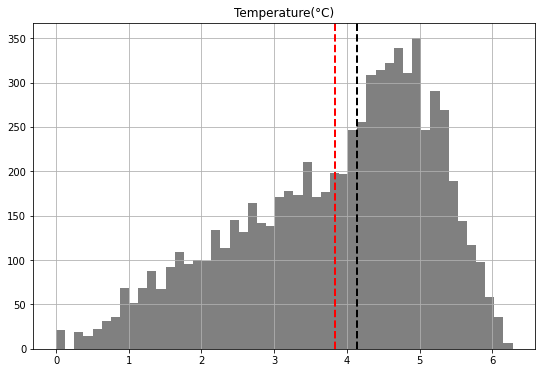

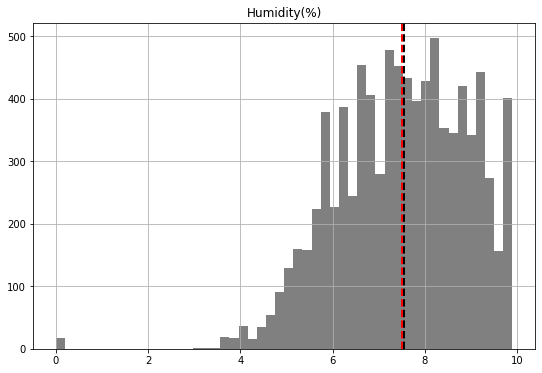

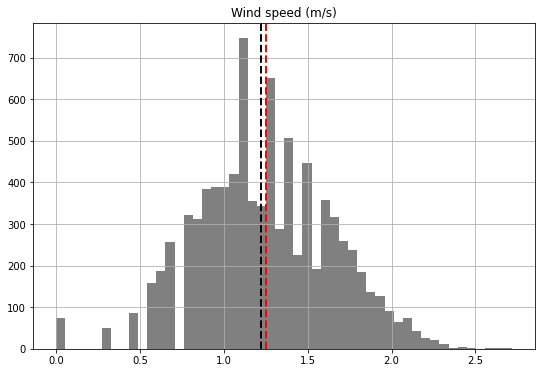

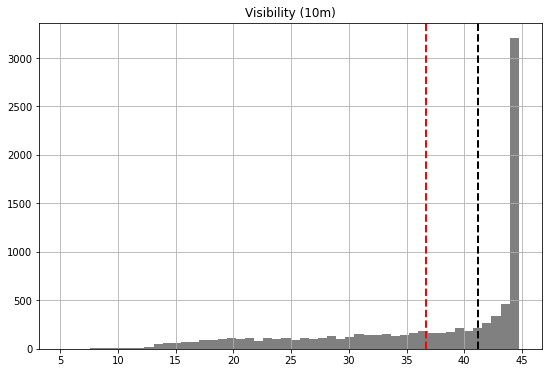

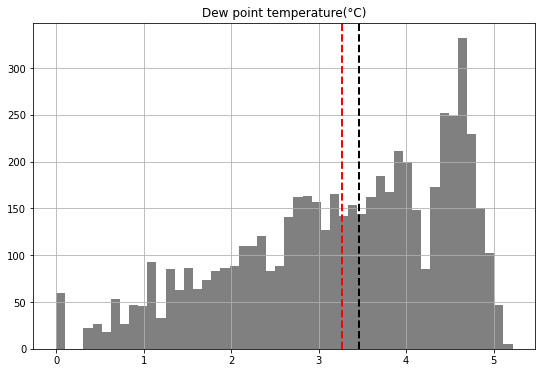

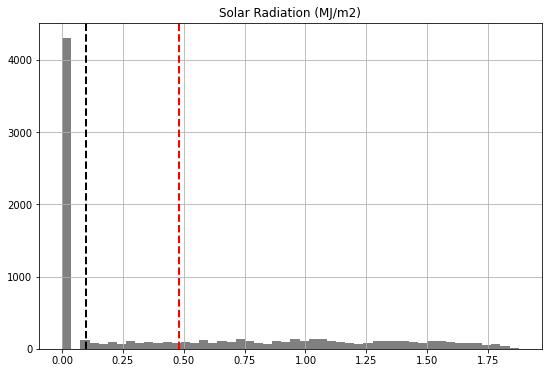

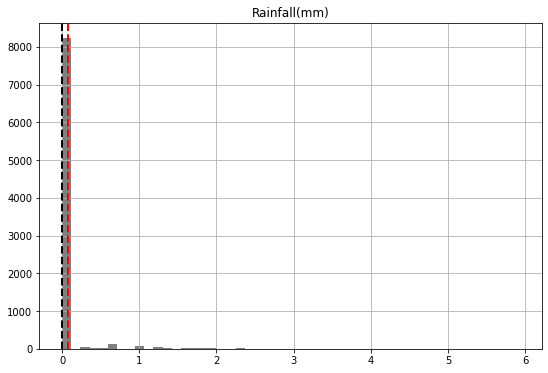

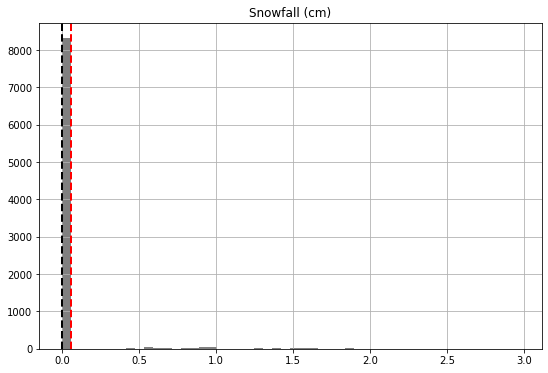

In [41]:
for j in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    math.sqrt(df[j]).hist(bins=50, ax = ax, color = 'grey')
    ax.axvline(math.sqrt(df[j]).mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(math.sqrt(df[j]).median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(j)
plt.show()

We can see that the affect of square-root on wind speed was the same as on the dependant variable. 


In [11]:
skewd_columns = ['Humidity(%)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

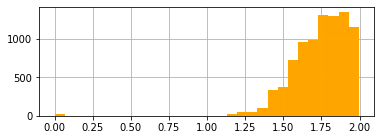

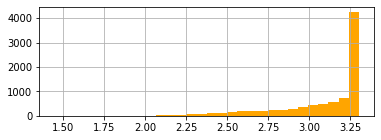

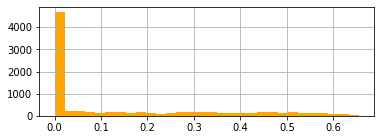

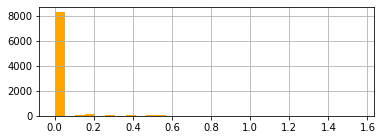

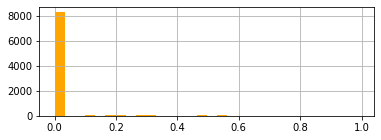

In [12]:
for col in skewd_columns:
  fig = plt.figure(figsize=(6,2))
  y = np.log10(df[col] + 1)
  y.hist(bins=30,color = 'orange')

# Feature Engineering

Date is the one of the most important features here since we are trying to predict the demand at a particular date and hour. We shall **convert date to a numeric columns.**


In [42]:
#Converting date to date-month-year
import datetime
df['Year'] = pd.DatetimeIndex(df['Date']).year   #getting year column
df['Month'] = pd.DatetimeIndex(df['Date']).month  #getting month column
df['Day'] = pd.DatetimeIndex(df['Date']).day  #getting Day column
# df.drop(labels = 'Date', axis = 1, inplace = True)  # removing the date column
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
2235,04/03/2018,90,3,8.5,96,0.4,238,7.8,0.0,0.1,0.0,Spring,No Holiday,Yes,2018,4,3
4801,19/06/2018,766,1,20.9,66,0.8,1528,14.3,0.0,0.0,0.0,Summer,No Holiday,Yes,2018,6,19
2374,09/03/2018,521,22,2.9,69,1.2,1179,-2.2,0.0,0.0,0.0,Spring,No Holiday,Yes,2018,9,3
1681,09/02/2018,159,1,-4.8,44,1.1,1432,-15.2,0.0,0.0,0.0,Winter,No Holiday,Yes,2018,9,2
4901,23/06/2018,339,5,21.1,48,0.3,2000,9.6,0.0,0.0,0.0,Summer,No Holiday,Yes,2018,6,23


# Hypothesis for the business problem 

1) The demand for bikes is less in winter/summer (due to extreme temperatures)

2) Weekdays have more demand for bikes since more commute happens on weekdays.

3) Demand for bikes during weekdays is higher during office hours.

4) There is lesser demand for bikes on Holidays.

5) Demand is lower on days with extreme weather conditions. 

6) Demand during the morning and evening hours is maximum (based on the assumption that people come and leave their offices during these times, so more commute).

# Catagorical variables

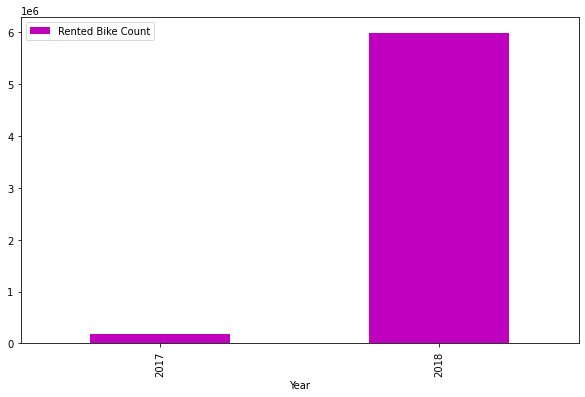

In [43]:
#ploting rented bikes according to year
year_bikecount = df.groupby(['Year'])['Rented Bike Count'].sum().reset_index()
year_bikecount.plot(x="Year", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

Only one month from 2017 is included(Dec,2017), so the sum is less. Lets take the mean to get a better understanding.

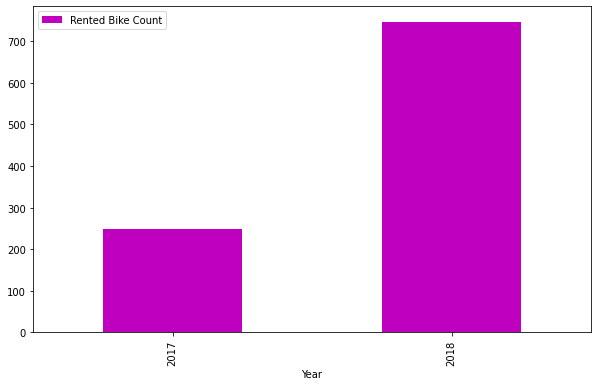

In [44]:
#ploting mean rented bikes according to year since the number of days from each year in the data might vary
year_bikecount = df.groupby(['Year'])['Rented Bike Count'].mean().reset_index()
year_bikecount.plot(x="Year", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

The demand in 2018 seem to have gone up! (although the data in 2017 is for only one month)

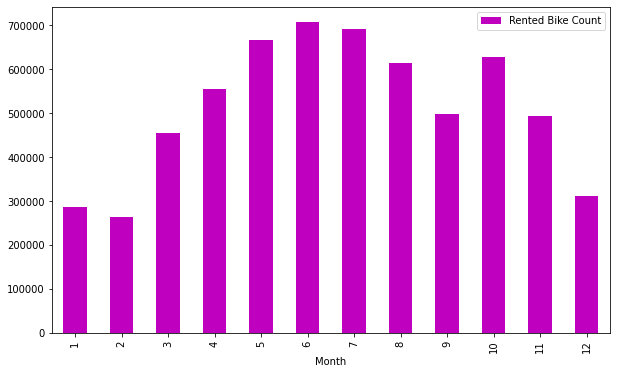

In [45]:
#ploting rented bikes according to Month
month_bikecount = df.groupby(['Month'])['Rented Bike Count'].sum().reset_index()
month_bikecount.plot(x="Month", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

The demand is highest in the months of June and July. This according to what we expected. The data seems to be from a non-tropical country. Since, the highest demand is there in the months of May-July(Summer). Similarly, we see lesser demand in the months of Dec/Jan. 

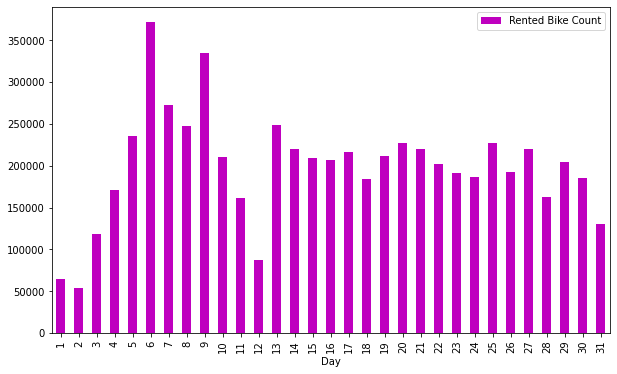

In [46]:
#ploting rented bikes according to Day
day_bikecount = df.groupby(['Day'])['Rented Bike Count'].sum().reset_index()
day_bikecount.plot(x="Day", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

Day of the month does not seem to be yeilding a particular trend, Lets convert to weekdays and try plotting the same.

Since we are checking rented bike counts, we might find a trend based on weekday. The demand for rented bikes might be higher or lower depending on what day of the week it is. 

In [48]:
#getting day of the week
df['Day_of_Week'] = pd.DatetimeIndex(df['Date']).weekday

In [49]:
def day_name_converter(p):
  days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  return days[p]

In [50]:
df['Day_of_Week1'] = df['Day_of_Week'].apply(day_name_converter)

avg Demand on Weekdays is 718
avg Demand on Weekends is 673


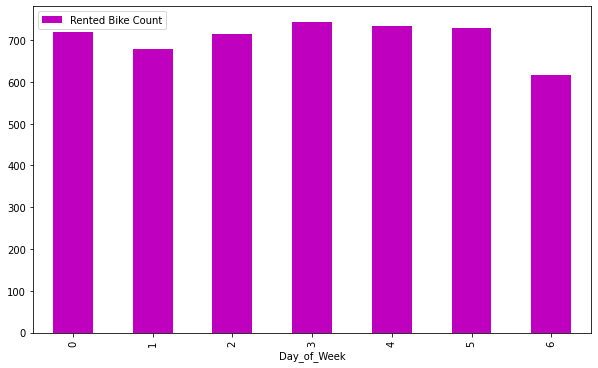

In [51]:
day_bikecount = df.groupby(['Day_of_Week'])['Rented Bike Count'].mean().reset_index()
day_bikecount.plot(x="Day_of_Week", y="Rented Bike Count", kind="bar", color = 'm',figsize=(10,6))
print('avg Demand on Weekdays is',round(day_bikecount.iloc[0:5,1].mean()))
print('avg Demand on Weekends is',round(day_bikecount.iloc[5:7,1].mean()))

We can see that the demand is least on Sundays. Sundays are a holiday so there are less people ccommuting to work on a Sunday. Moreover, the avg rented bikes count on weekends is only 673. As compared to 718 on weekdays. **This validates our 2nd hypothesis.**

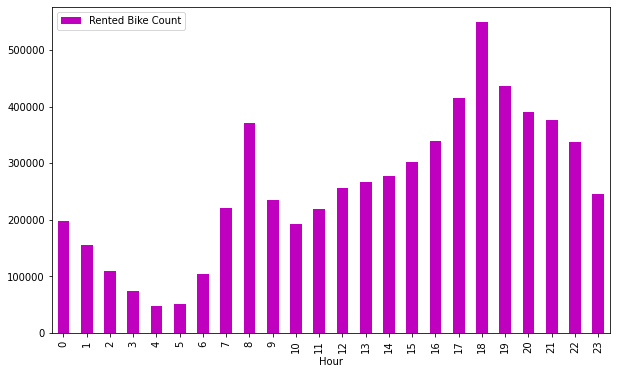

In [52]:
#ploting rented bikes according to Time of the day
Hourly_bikecount = df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
Hourly_bikecount.plot(x="Hour", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

We can see that the demand peaks twice in the 24 hours. Once at 9 am and again at 6 pm validating one of our assumptions

Hour of the day is a categorical variable. Lets group hours into different times of the day and see if there is a relationship between bikes rented and time of the day.

In [53]:
# grouping hour of the day into 6 equal bins of 4 hours(might be a useful feature for model applicaton later)
def timeofday(x):
  if 16 <= x <= 19:
    y = 'Evening'
  elif 20 <= x <= 23:
    y = 'Night'
  elif 0 <= x <= 3:
    y = 'Late Night'
  elif 4 <= x <= 7:
    y = 'Early Morning'
  elif 8 <= x <= 11:
    y = 'Morning'
  elif 12 <= x <= 15:
    y = 'Afternoon'
  return y
df['time_of_day'] = df['Hour'].apply(timeofday)

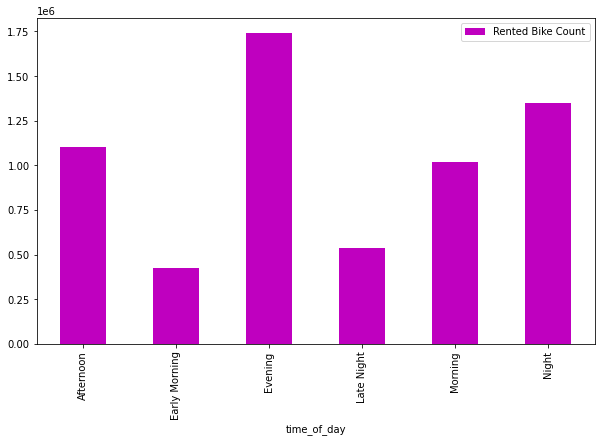

In [54]:
#ploting rented bikes according to time of the day
Seasonal_bikecount = df.groupby(['time_of_day'])['Rented Bike Count'].sum().reset_index()
Seasonal_bikecount.plot(x='time_of_day', y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

We can see that the demand is highest during the evening hours, this partially validates our assumption in the last hypotheisis.

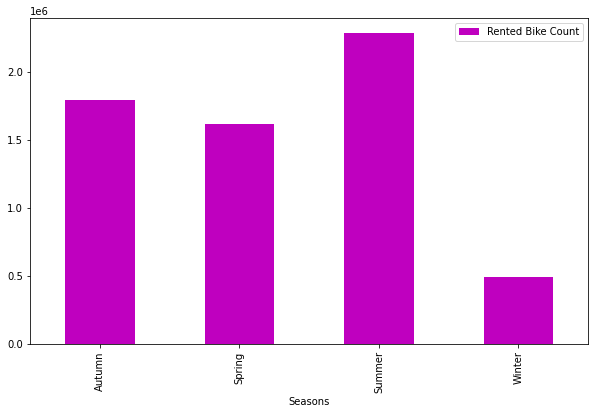

In [55]:
#ploting rented bikes according to Seasons
Seasonal_bikecount = df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
Seasonal_bikecount.plot(x="Seasons", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

**This plot validates our hypothesis that the demand for bikes during the winters is much lesser**. This could be because people dont travel on bikes in winters. The temperature might not be suitable for riding.

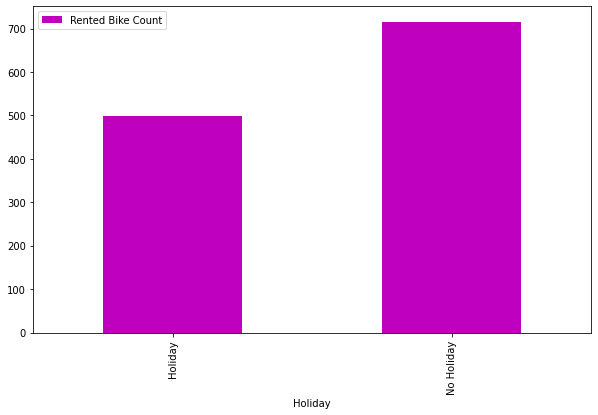

In [56]:
#ploting rented bikes mean according to Holiday
day_bikecount = df.groupby(['Holiday'])['Rented Bike Count'].mean().reset_index()
day_bikecount.plot(x="Holiday", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

**This also validates our hypothesis that the demand for bikes on holidays is less.** This could be because people dont commute to work on Holidays, thus decreasing the demand for rented bike counts on Holidays. 

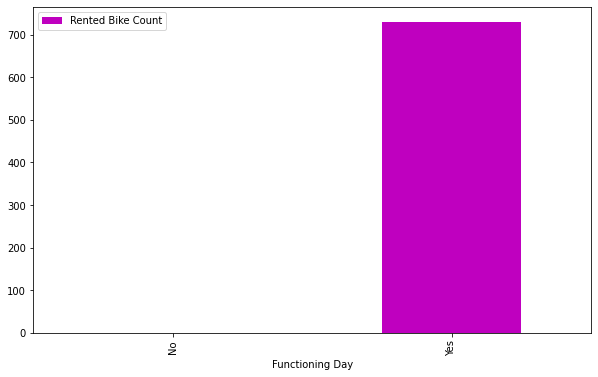

In [57]:
# ploting rented bikes mean according to Functioning day
Funct_day_bikecount = df.groupby(['Functioning Day'])['Rented Bike Count'].mean().reset_index()
Funct_day_bikecount.plot(x="Functioning Day", y=["Rented Bike Count"], kind="bar", color = 'm',figsize=(10,6))

Here, we can see that the metric which we are using to calculate demand goes to zero on the non functioning days ('Rented bike Counts') indicating that the demand is zero on those days. **This not an accurate assumption** since there might be demand for the bikes, but the business is not able to supply on these days. 

We need to remove such rows from our data set since they do-not provide a correct measure of bike demand. 

In [58]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [59]:
# droping rows where functioning day is 'No'
df = df[df['Functioning Day'] == 'Yes']

In [60]:
df.shape

(8465, 20)

In [61]:
# Functioning day doesnt seem to be contributing anything to Rented Bike Count as a feature
df.drop(labels = 'Functioning Day',axis=1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day,Day_of_Week,Day_of_Week1,time_of_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,3,Thursday,Late Night
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,3,Thursday,Late Night


**Plotting the numeric features vs the dependant variable.**


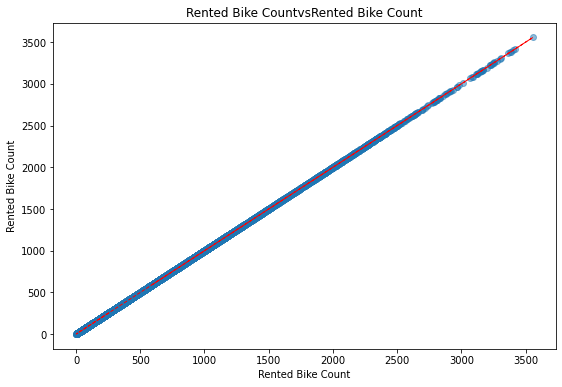

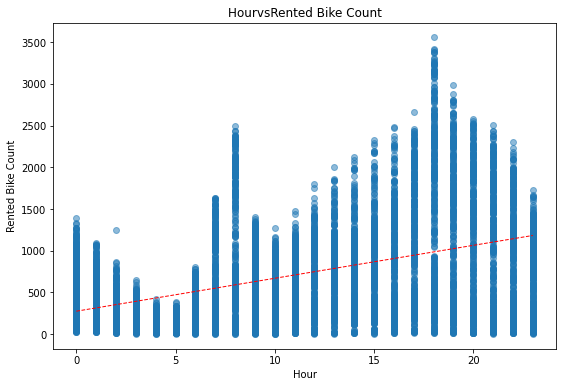

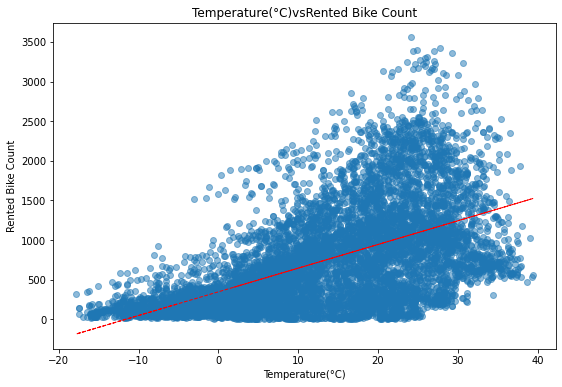

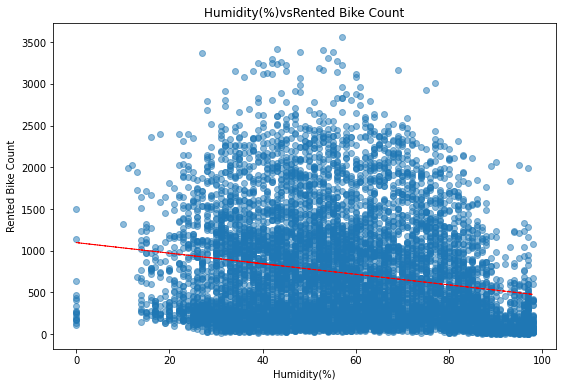

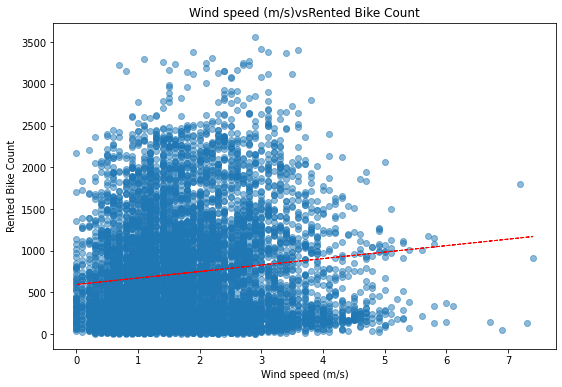

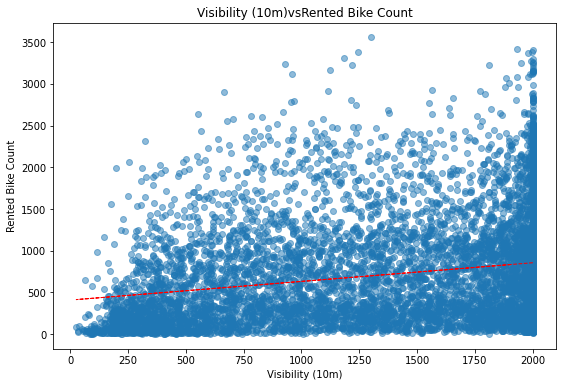

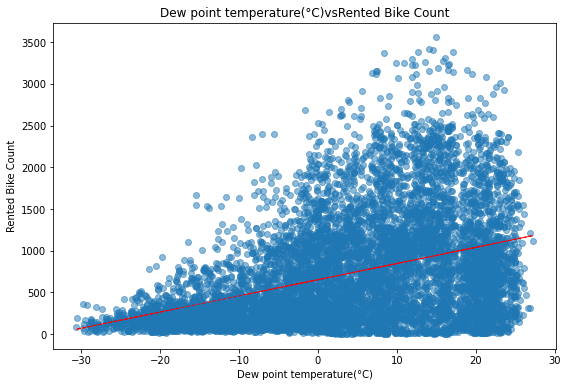

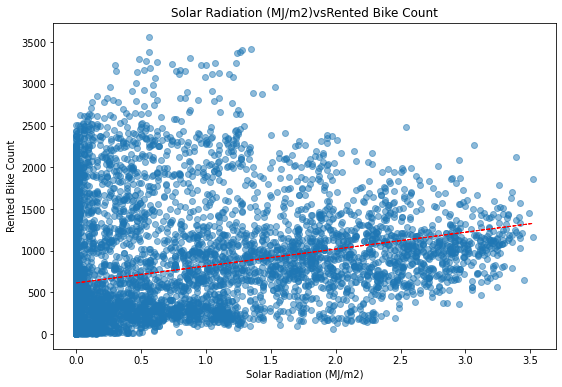

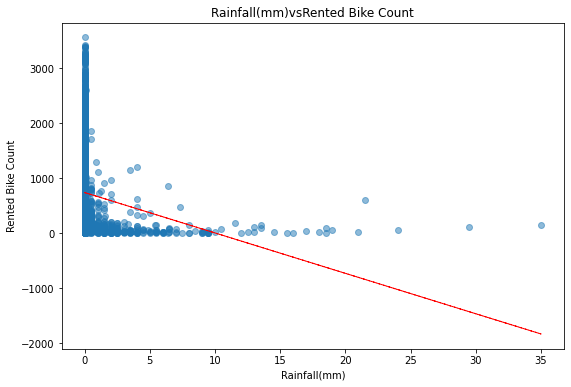

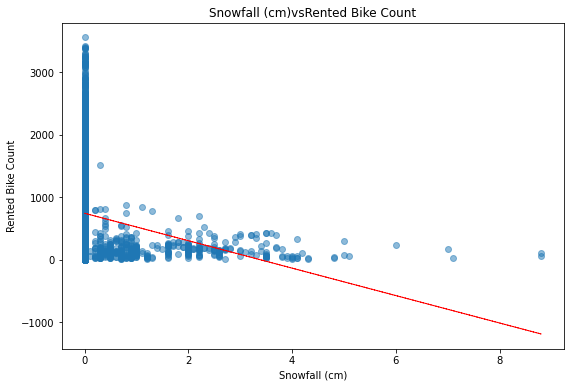

In [63]:
for i in numeric_features:
  plt.figure(figsize=(9,6))
  plt.scatter(df[i], y=df['Rented Bike Count'], alpha = 0.5)
  plt.xlabel(i)
  plt.ylabel('Rented Bike Count')
  plt.title( i + 'vs' 'Rented Bike Count')
  z = np.polyfit(df[i], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i])
  plt.plot(df[i], y_hat, "r--", lw=1)
  plt.show()

None of the variables seem to be directly propotional or correlated with 'rented bike count'. Windspeed, temperature and solar radiation have somewhat of a linear relationship with the demand but its not very clear. 

**Checking for Correlation**

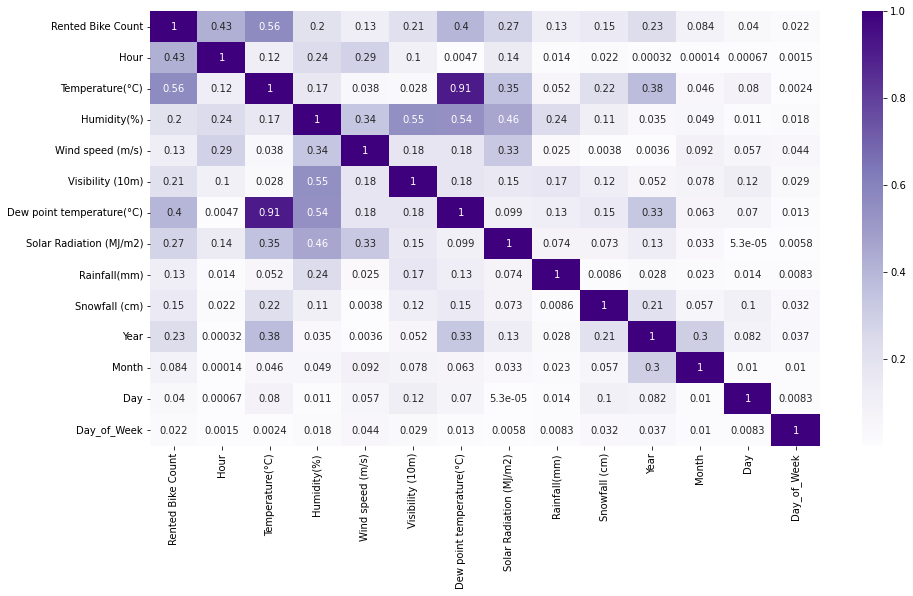

In [64]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, square=False, cmap='Purples')

Temperature and Dew point temperature are highly correlated. We do not need highly correlated features in our data data-set(Lets remove one).
Lets check VIF for these variables.

In [65]:
# vif calculating function 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
# remove from the highly correlated feature
calc_vif(df[[i for i in numeric_features  if i not in ['Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,4.617043
1,Hour,4.815356
2,Temperature(°C),4.589017
3,Humidity(%),5.048064
4,Wind speed (m/s),4.625286
5,Visibility (10m),4.880668
6,Solar Radiation (MJ/m2),2.243573
7,Rainfall(mm),1.110039
8,Snowfall (cm),1.122836


We chose to drop Dew point temperature(°C) since it had lower correlation with the dependent variable. All the VIF values seems appropiate now(<5). Not much multi-collinearity. 

In [ ]:
df.head(5)

# Data Preparation

In [80]:
#creating a copy of the data set to use 
df_pr = df.copy()

In [81]:
df_pr.shape

(8465, 19)

In [82]:
# droping dupliate variables and variables with multi-collinearilty
df_pr.drop(labels = ['Day_of_Week','Date','Dew point temperature(°C)','time_of_day' ] ,axis = 1,inplace = True)

In [83]:
df_pr.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day,Day_of_Week1
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12,Thursday


In [84]:
# One hot encoding
df_pr = pd.get_dummies(df_pr, columns=["Seasons", "Holiday" ,'Hour','Month','Day','Day_of_Week1','Year'])

In [85]:
df_pr.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,...,Day_31,Day_of_Week1_Friday,Day_of_Week1_Monday,Day_of_Week1_Saturday,Day_of_Week1_Sunday,Day_of_Week1_Thursday,Day_of_Week1_Tuesday,Day_of_Week1_Wednesday,Year_2017,Year_2018
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [87]:
df_pr

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,...,Day_31,Day_of_Week1_Friday,Day_of_Week1_Monday,Day_of_Week1_Saturday,Day_of_Week1_Sunday,Day_of_Week1_Thursday,Day_of_Week1_Tuesday,Day_of_Week1_Wednesday,Year_2017,Year_2018
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
8756,764,3.4,37,2.3,2000,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
8757,694,2.6,39,0.3,1968,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
8758,712,2.1,41,1.0,1859,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [88]:
features = list(df_pr.columns)[1:] # getting all the features together and determing X and y
X = df_pr[features]
y = math.sqrt(df_pr['Rented Bike Count'])

In [89]:
#test train spilt and scaling
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

(6772, 89)
(1693, 89)


array([[-1.5488159 , -1.27212732,  0.74002609, ..., -0.41280908,
         3.25208677, -3.25208677],
       [ 0.85588137,  1.22372383, -0.22378972, ..., -0.41280908,
        -0.30749487,  0.30749487],
       [-0.338232  , -0.4891152 ,  2.28213139, ...,  2.42242733,
        -0.30749487,  0.30749487],
       ...,
       [ 0.78999926,  0.19602041, -0.80207921, ..., -0.41280908,
        -0.30749487,  0.30749487],
       [-0.66764258,  0.97903254, -0.22378972, ..., -0.41280908,
        -0.30749487,  0.30749487],
       [-1.25234637, -1.37000384,  0.93278925, ..., -0.41280908,
         3.25208677, -3.25208677]])

# **Applying models**

In [90]:
#Reguarised linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('r2 for lr =', r2_score((y_test)**2, (y_pred)**2))

r2 for lr = 0.7287148134371044


In [99]:
#lasso/L1
from sklearn.linear_model import Lasso
#hyperparam tunning 
from sklearn.model_selection import GridSearchCV
Lasso = Lasso()
#hyperparameter tunning
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1,5,6,8,10,14,20,30,40,50]}
Lasso_regressor = GridSearchCV(Lasso, parameters, scoring='neg_mean_squared_error', cv=5) 
Lasso_regressor.fit(X_train,y_train)
y_pred_Lasso = Lasso_regressor.predict(X_test)
print('r2 for Ridge =', r2_score((y_test)**2, (y_pred_Lasso)**2))
print("The best fit alpha value is found out to be :" ,Lasso_regressor.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.562e+03, tolerance: 7.686e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.454e+03, tolerance: 7.603e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

r2 for Ridge = 0.7282643399567897
The best fit alpha value is found out to be : {'alpha': 0.001}


In [101]:
#RMSLE for lasso
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error((y_test)**2, (y_pred_lasso)**2)
rmsle=np.sqrt(msle)
print('RMLSE for the data Lasso:',rmsle)

RMLSE for the data Lasso: 0.8276824967966538


In [100]:
#Ridge/L2
from sklearn.linear_model import Ridge
#hyperparam tunning 
from sklearn.model_selection import GridSearchCV
Ridge = Ridge()
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1,5,6,8,10,14,20,30,40,50]}
Ridge_regressor = GridSearchCV(Ridge, parameters, scoring='neg_mean_squared_error', cv=5) 
Ridge_regressor.fit(X_train,y_train)
y_pred_ridge = Ridge_regressor.predict(X_test)
print('r2 for Ridge =', r2_score((y_test)**2, (y_pred_ridge)**2))
print("The best fit alpha value is found out to be :" ,Ridge_regressor.best_params_)

#RMSLE
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error((y_test)**2, (y_pred_ridge)**2)
rmsle=np.sqrt(msle)
print('RMLSE for the data Lasso:',rmsle)

r2 for Ridge = 0.7275159665479174
The best fit alpha value is found out to be : {'alpha': 5}
RMLSE for the data Lasso: 0.8235411501671266


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [103]:
#Hyperparameter tuning for DT
hyperP_DT = {'max_depth':np.arange(8,100,2),'max_leaf_nodes': np.arange(100,500,10)}
DTregressor1 = GridSearchCV(DecisionTreeRegressor(random_state=88), hyperP_DT, cv=4)
DTregressor1.fit(X_train,y_train) 
y_pred_DTregressor1 = DTregressor1.predict(X_test)
DTregressor1.best_params_

{'max_depth': 22, 'max_leaf_nodes': 240}

In [104]:
print('r2 for DT =', r2_score((y_test)**2, (y_pred_DTregressor1)**2))
print('r2 on train set DT =', DTregressor1.score(X_train,y_train) )

#RMSLE
msle=mean_squared_log_error((y_test)**2, (y_pred_DTregressor1)**2)
rmsle=np.sqrt(msle)
print('RMLSE for the data DT1:',rmsle)
#Tree Properties
#print('Tree Depth',DTregressor1.get_depth())
# print('Tree Max Nodes', DTregressor1.get_n_leaves())

r2 for DT = 0.7580913881498392
r2 on train set DT = 0.915804218320202
RMLSE for the data DT1: 0.610976185605968


In [105]:
# Trial Decision Tree Regressor
DTregressor = DecisionTreeRegressor(max_leaf_nodes = 400, random_state=88)
DTregressor.fit(X_train,y_train)
y_pred_DTregressor = DTregressor.predict(X_test)

In [106]:
print('r2 for DT =', r2_score((y_test)**2, (y_pred_DTregressor)**2))
print('r2 on train set DT =', DTregressor.score(X_train,y_train))
#RMSLE
msle=mean_squared_log_error((y_test)**2, (y_pred_DTregressor)**2)
rmsle=np.sqrt(msle)
print('RMLSE for the data DT:',rmsle)
print('RMLSE for the data DT :',rmsle)
#Tree Properties
print('Tree Depth',DTregressor.get_depth())
print('Tree Max Nodes', DTregressor.get_n_leaves())

r2 for DT = 0.7631120356875971
r2 on train set DT = 0.9431212721545797
RMLSE for the data DT: 0.6069561237649596
RMLSE for the data DT : 0.6069561237649596
Tree Depth 26
Tree Max Nodes 400


In [107]:
#RF
RFRegressor = RandomForestRegressor()
Hyperparam_RF = {'n_estimators':[50, 80 ,100], 'max_depth':np.arange(20,30,1)}
RFRegressor = GridSearchCV(RFRegressor, param_grid = Hyperparam_RF, cv=3)

# Fit the object to train dataset
RFRegressor.fit(X_train, y_train)
y_pred_RFregressor = RFRegressor.predict(X_test)
RFRegressor.best_params_

{'max_depth': 26, 'n_estimators': 100}

In [108]:
y_pred_RFregressor_train = RFRegressor.predict(X_train)

In [109]:
print('r2 for test-set rf =', r2_score((y_test)**2, (y_pred_RFregressor)**2))
print('r2 on train set rf =', r2_score((y_train)**2, (y_pred_RFregressor_train)**2))
#RMSLE
msle=mean_squared_log_error((y_test)**2, (y_pred_RFregressor)**2)
rmsle=np.sqrt(msle)
print('RMLSE for the data rf:',rmsle)

r2 for test-set rf = 0.8444989511808483
r2 on train set rf = 0.9800723626827882
RMLSE for the data rf: 0.4863704421593426


In [110]:
#ADA-Boost
from sklearn.ensemble import AdaBoostRegressor
AdaRegressor = AdaBoostRegressor()
#Hyper-parameter tunning for AdaBoost
Hyperparam_AB = {'n_estimators':[100,150,200] ,'learning_rate': [0.1,1,10]}
AdaRegressor = GridSearchCV(AdaRegressor, param_grid= Hyperparam_AB, scoring='r2')

#fitting to train data
AdaRegressor.fit(X_train,y_train)
y_pred_AdaBoost = AdaRegressor.predict(X_test)
y_pred_AdaBoost_train = AdaRegressor.predict(X_train)
AdaRegressor.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [111]:
print('r2 for test-set ADA-Boost =', r2_score((y_test)**2, (y_pred_AdaBoost)**2))
print('r2 on train set ADA-Boost =', r2_score((y_train)**2, (y_pred_AdaBoost_train)**2))

r2 for test-set ADA-Boost = 0.5706653689743914
r2 on train set ADA-Boost = 0.585049594294786


In [112]:
#GBM
from sklearn.ensemble import GradientBoostingRegressor
GBMregressor = GradientBoostingRegressor()
#Hyperparameter tunning
Hyperparam_GBM = {'learning_rate':[0.1], 'n_estimators':[100,500,1000]}
GBMregressor = GridSearchCV(GBMregressor,param_grid = Hyperparam_GBM )
#fitting to train data
GBMregressor.fit(X_train,y_train)
y_pred_GBMregressor = GBMregressor.predict(X_test)
y_pred_GBMregressor_train = GBMregressor.predict(X_train)
GBMregressor.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [113]:
print('r2 for test-set GBM =', r2_score((y_test)**2, (y_pred_GBMregressor)**2))
print('r2 on train set GBM =', r2_score((y_train)**2, (y_pred_GBMregressor_train)**2))

r2 for test-set GBM = 0.8827658687355519
r2 on train set GBM = 0.9472524303669758


# **Conclusion**

**Gradient Boosting regressor** performed the **best** among all the algorithms we experimented. It had an **r-square value of 0.88**.

Adaptive Boost was the worst among all the algorithms. 